<a href="https://colab.research.google.com/github/Alayasokan/AI/blob/main/It_is_a_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install fastbook

In [85]:
from fastbook import *

In [86]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://images6.fanpop.com/image/photos/36000000/Birds-image-birds-36097361-1600-1200.jpg')

In [87]:
dest = Path('bird.jpg')
if not dest.exists():download_url(urls[0], dest, show_progress=False)

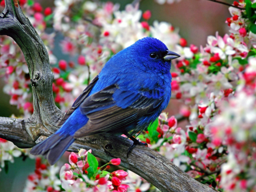

In [88]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [89]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  parent = (path)
  parent.mkdir(exist_ok=True)
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [90]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

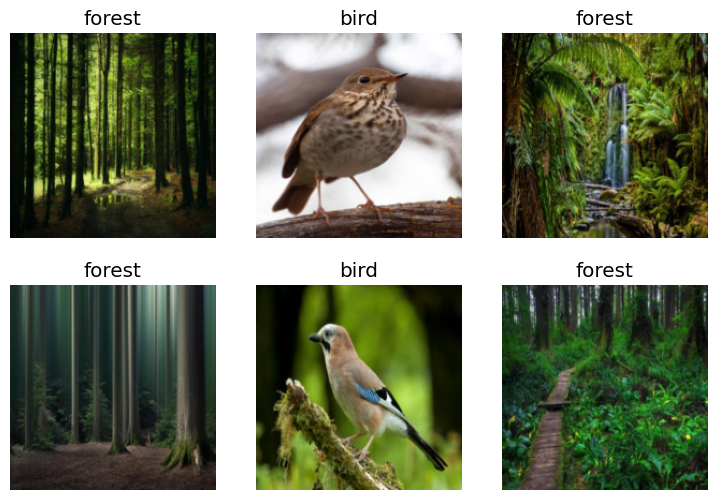

In [91]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [92]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.848211,0.917536,0.293333,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.062090,0.137988,0.066667,00:52
1,0.030681,0.008961,0.000000,00:54
2,0.020913,0.000916,0.000000,00:51


In [93]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a : {is_bird}.")
print(f"Probablitiy it's a bird: {probs[0]:4f}")

This is a : bird.
Probablitiy it's a bird: 1.000000
